In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import RFE
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('C:\\Users\\Shri Hema\\OneDrive\\Desktop\\task 5\\heart.csv')
print(df.head(5))

print(df.tail())

print(df.columns.values)

print(df.isna().sum())
print(df.info())

print(df.describe())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trestbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalach'}>],
       [<Axes: title={'center': 'exang'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'ca'}>],
       [<Axes: title={'center': 'thal'}>,
        <Axes: title={'center': 'target'}>, <Axes: >, <Axes: >]],
      dtype=object)

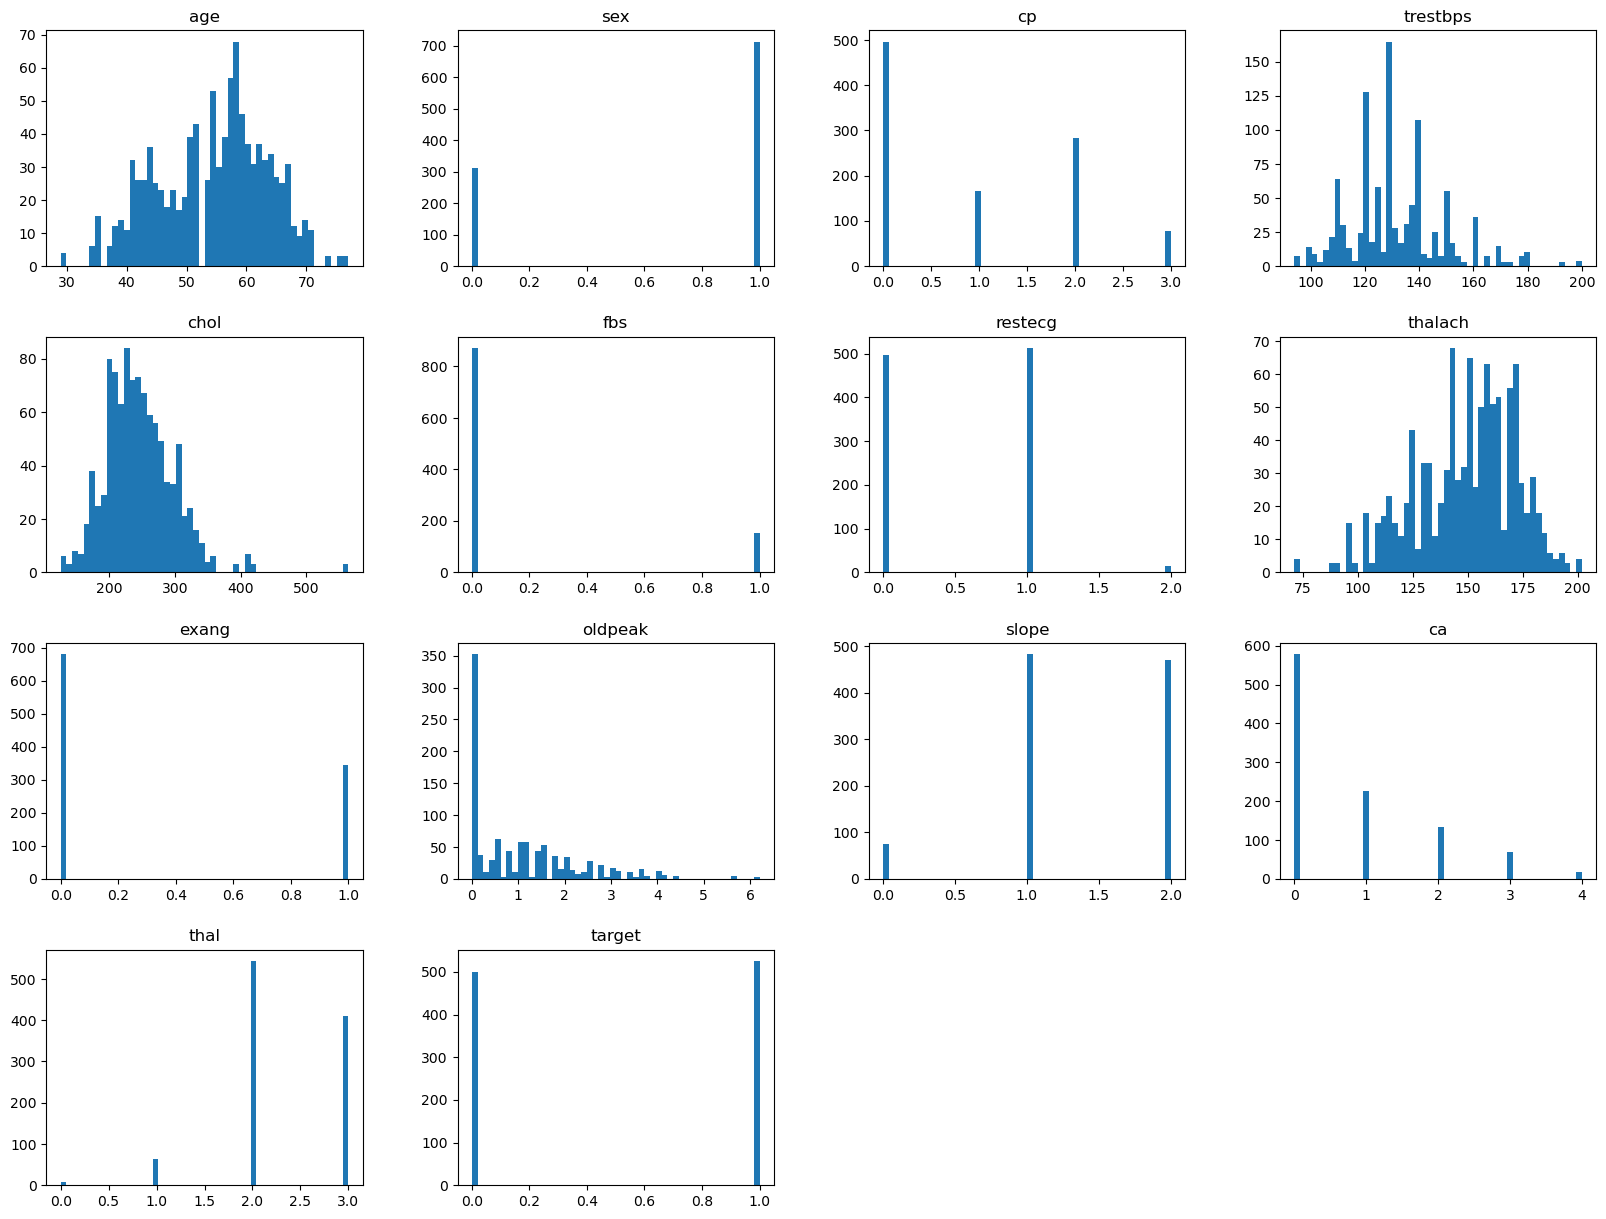

In [3]:
df.hist(bins = 50,grid = False,figsize=(20,15))


target
1    526
0    499
Name: count, dtype: int64


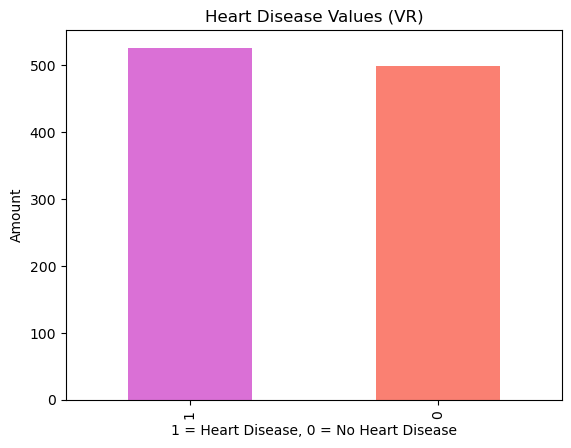

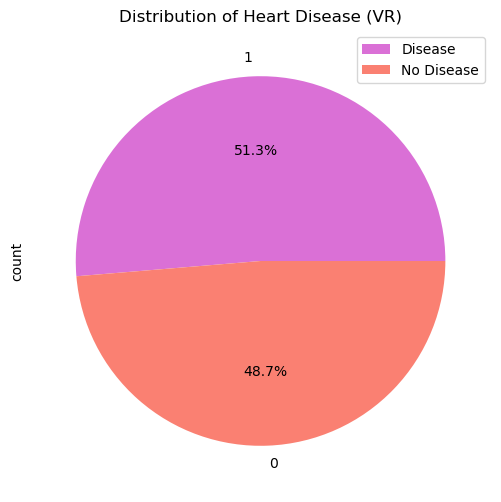

sex
1    713
0    312
Name: count, dtype: int64


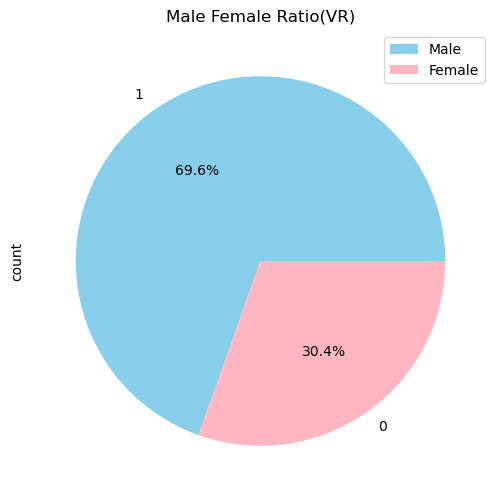

In [4]:
#answer 1 :-
print(df.target.value_counts())

#bar chart
df.target.value_counts().plot(kind='bar', color=["orchid", "salmon"])
plt.title("Heart Disease Values (VR)")
plt.xlabel("1 = Heart Disease, 0 = No Heart Disease")
plt.ylabel("Amount")
plt.show()

#pie chart
df.target.value_counts().plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%', colors=["orchid", "salmon"])
plt.title("Distribution of Heart Disease (VR)")
plt.legend(["Disease", "No Disease"])
plt.show()

print(df.sex.value_counts())
df.sex.value_counts().plot(kind='pie', figsize=(8, 6), autopct='%1.1f%%', colors=["skyblue", "lightpink"])
plt.title('Male Female Ratio(VR)')
plt.legend(['Male', 'Female'], loc="upper right")
plt.show()

sex       0    1
target          
0        86  413
1       226  300


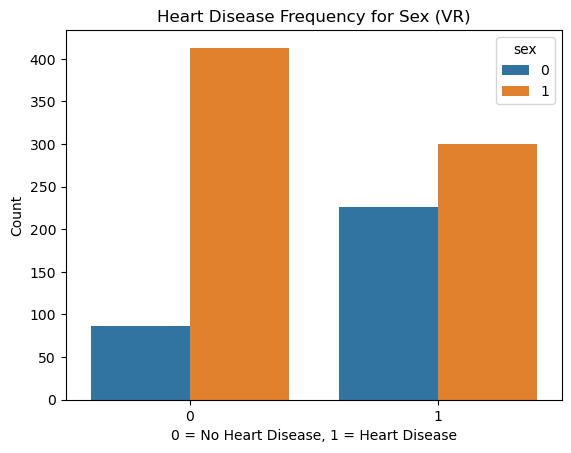

In [5]:
#answer 2:-
cross_tab = pd.crosstab(df.target, df.sex)

# Display the cross-tabulation
print(cross_tab)
sns.countplot(x='target', data=df, hue='sex')
plt.title("Heart Disease Frequency for Sex (VR)")
plt.xlabel("0 = No Heart Disease, 1 = Heart Disease")
plt.ylabel("Count")
plt.show()

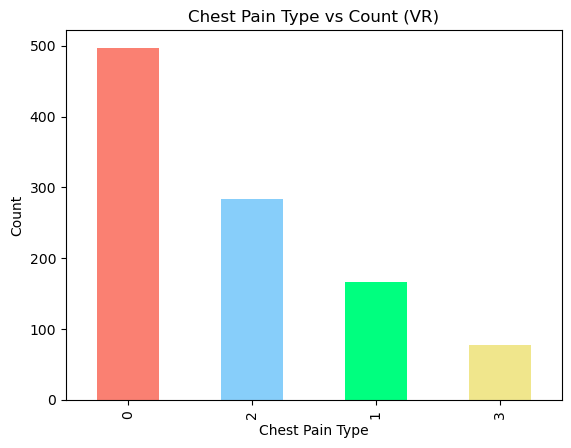

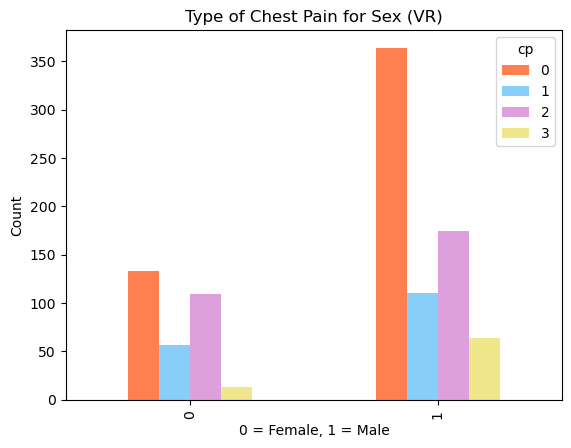

In [6]:
#answer 3 :-
df.cp.value_counts().plot(kind='bar', color=['salmon', 'lightskyblue', 'springgreen', 'khaki'])
plt.title('Chest Pain Type vs Count (VR)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()
#3.2
pd.crosstab(df.sex, df.cp).plot(kind='bar', color=['coral', 'lightskyblue', 'plum', 'khaki'])
plt.title('Type of Chest Pain for Sex (VR)')
plt.xlabel('0 = Female, 1 = Male')
plt.ylabel('Count')
plt.show()


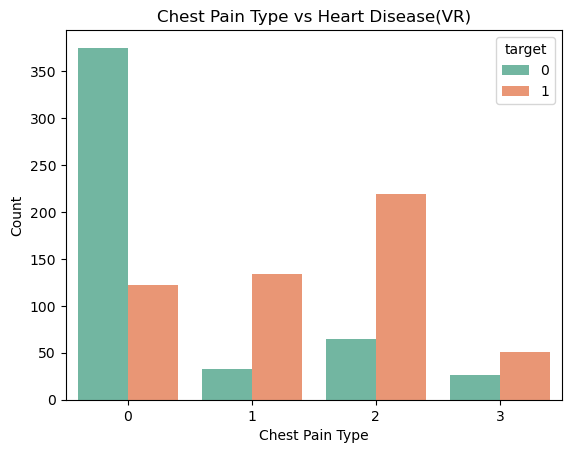

C:\Users\Shri Hema\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


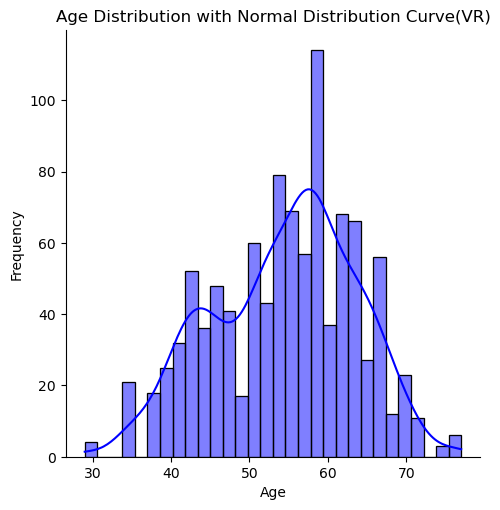

In [7]:
#answer 4 
sns.countplot(x='cp', data=df, hue='target', palette='Set2')
plt.title('Chest Pain Type vs Heart Disease(VR)')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.show()

# Create the distribution plot with a normal distribution curve
sns.displot(x='age', data=df, bins=30, kde=True, color='blue')


plt.title('Age Distribution with Normal Distribution Curve(VR)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

C:\Users\Shri Hema\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


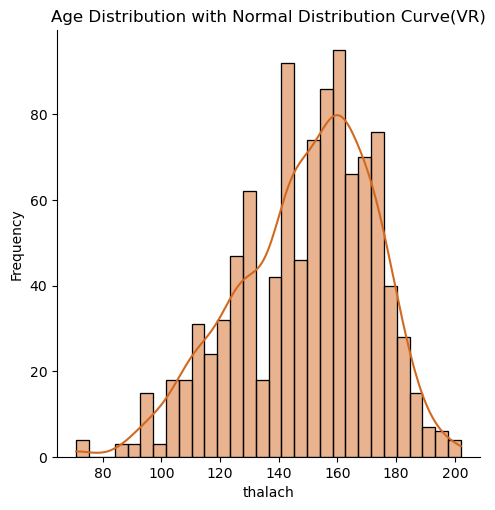

In [8]:
sns.displot(x='thalach', data=df, bins=30, kde=True, color='chocolate')
plt.title('Age Distribution with Normal Distribution Curve(VR)')
plt.xlabel('thalach')
plt.ylabel('Frequency')
plt.show()

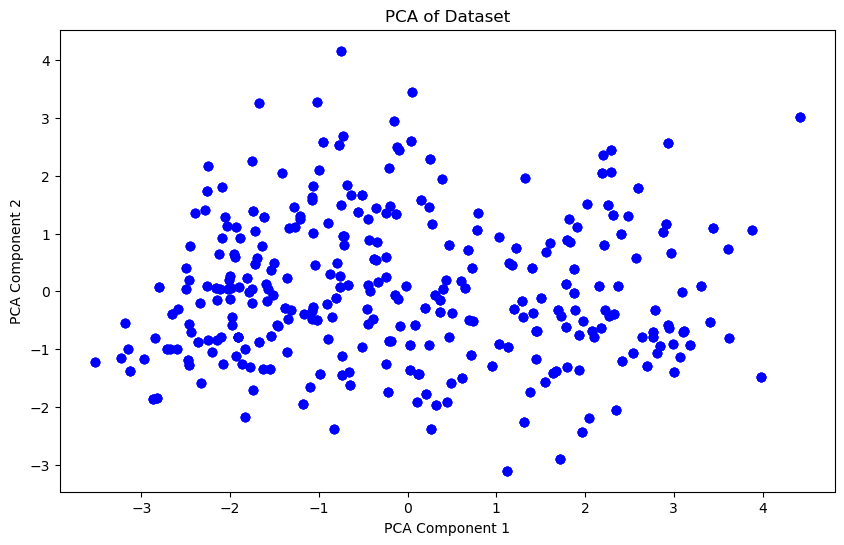

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[float, int]))
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plot PCA results
plt.figure(figsize=(10, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c='blue')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Dataset')
plt.show()